In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy



In [ ]:
# import what we just installed

import pandas as pd
import seaborn as snsj
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

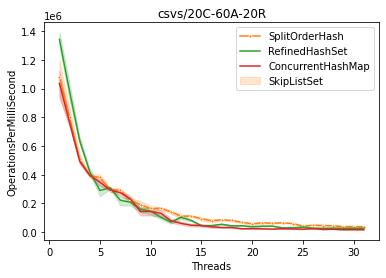

In [18]:
# Operations Per Millisecond Graph for single CSV above

palette = sns.color_palette('tab10', 5)

fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='p',data=df16,ax=axs, ci=99 , color=palette[0])


sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='.',data=df16r,ax=axs, ci=99 , color=palette[1])
sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='',data=df1c,ax=axs, ci=99 , color=palette[2])
sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='',data=df1cs,ax=axs, ci=99 , color=palette[3])


#sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='+',data=df1c,ax=axs, ci=99, color='black')
#sns.lineplot(x="Threads", y="OperationsPerMilliSecond", marker='+',data=df1cs,ax=axs, ci=99, color='black')


plt.title(csv_name[0:-4])


#axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
axs.legend(['SplitOrderHash', 'RefinedHashSet', 'ConcurrentHashMap', 'SkipListSet'], loc=1)


In [ ]:
import seaborn as sns
csv_names = ['csvs/33C-33A-33R.csv',
             'csvs/20C-40A-40R.csv', 
             'csvs/10C-45A-45R.csv', 
             'csvs/2C-49A-49R.csv', 
             'csvs/40C-40A-20R.csv', 
             'csvs/20C-60A-20R.csv', 
             'csvs/10C-80A-10R.csv']


for csv_name in csv_names:
    df = pd.read_csv(csv_name)
    df16 = df[df['Name'] == 'splitOrderHash_MaxLoad_8']
    df16r = df[df['Name'] == 'Refinable16']
    df1c = df[df['Name'] == 'concHashMap']
    df1cs = df[df['Name'] == 'concSkipListSet']
    df1sh = df[df['Name'] == 'syncHashSet']

    dataframes = [df16, df16r, df1c, df1cs, df1sh] 
    #create new dataframes so that all ops/per columns averaged per each Thread. Less jagged lines. 
    # do this type conversion and should be all set
    for df in dataframes:
        df['Threads'] = df['Threads'].astype(float)
        df['OperationsPerMilliSecond'] = df['OperationsPerMilliSecond'].astype(float)
        df['LogOperationsPerMilliSecond'] = df['LogOperationsPerMilliSecond'].astype(float)
        
    
    palette = sns.color_palette('tab10', 5)

    fig, axs = plt.subplots(ncols=1)
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='p',data=df16,ax=axs, ci=99.5 , color=palette[0])


    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='.',data=df16r,ax=axs, ci=99.5 , color=palette[1])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1c,ax=axs, ci=99.5 , color=palette[2])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1cs,ax=axs, ci=99.5 , color=palette[3])
    sns.lineplot(x="Threads", y="LogOperationsPerMilliSecond", marker='',data=df1sh,ax=axs, ci=99.5 , color=palette[4])


    #plt.title(csv_name[0:-4])


    #axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

    #axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
    axs.legend(['SplitOrderHash', 'RefinedHashSet', 'ConcurrentHashMap', 'SkipListSet', 'SynchHashSet'], loc=1)
    plt.savefig('figs/' + csv_name[5:-4] + '.png')

    
